In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.stats.weightstats as smw
import statsmodels.stats.proportion as smp

plt.style.use("seaborn")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('mydrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at mydrive


# <font color = "Red"> Confidence Intervals </font>

## <font color = "blue"> Exponential Function </font>
**Find:**

 * **A set of random variables found from the exponential distribution with mean = 1**
 * **Find the mean, the standard deviation and the length**
 * **Assuming a population variance of 1.5, find the 95% confindence interval**
 * **The use the `statsmodels`package to find the same confidence interval**
 * **Interpret it the confidence intervals**
 * **Are both intervals the same? If not...why?**

Let's first generate the exponential values. We are going to stablish a seed so that our results are repeatable. See that the exponential has `loc` and `scale` as arguments. By default `loc = 0` and `scale = 1`. The usual reparametrization is that $\lambda = 1/\text{scale}$. Then

In [ ]:
np.random.seed(101)
data = ss.expon.rvs(size = 500)

In [ ]:
data_mean = data.mean()
data_std = data.std()
n = len(data)

print([data_mean, data_std, n])

[1.0185713688866522, 0.9947293068916093, 500]


now we look for the confidence interval using the formula explicitely

In [ ]:
CL = 0.95
SL = 1 - CL

sigma = np.sqrt(1.5)
z_val = ss.norm.isf(SL/2)


ME = z_val*sigma/np.sqrt(n)

lower = data_mean - ME
upper = data_mean + ME

print('The 95% CI for the pop. mean is [{:4.2f}, {:4.2f}]'.format(lower, upper))

The 95% CI for the pop. mean is [0.91, 1.13]


We can also find the confidence interval using the `statsmodels` package

In [ ]:
des = smw.DescrStatsW(data)

lower_ss, upper_ss = des.zconfint_mean(SL)
print('The 95% CI for the pop. mean is [{:4.2f}, {:4.2f}]'.format(lower_ss, upper_ss))

The 95% CI for the pop. mean is [0.93, 1.11]


The two confidence intervals do not coincide because the function `zconfin_mean` uses the standard deviation of the sample instead of a population value. In fact we we use it in the formula we obtain the same resulta

In [ ]:
CL = 0.95
SL = 1 - CL

z_val = ss.norm.isf(SL/2)

ME = z_val*data_std/np.sqrt(n)

lower = data_mean - ME
upper = data_mean + ME

print('The 95% CI for the pop. mean is [{:4.2f}, {:4.2f}]'.format(lower, upper))

The 95% CI for the pop. mean is [0.93, 1.11]


The interpretation of this confidence interval is that:

"We are 95% confident that the population mean will be in the range we have found. And the confidence implies that if we were to repeat the experiment a completely arbitrary large number of times, 95% of the times the population mean lie in the range we find, and 5% will not"

---

## <font color="slateblue">Financial Status</font>

**The SEC requires companies to file annual reports concerning their financial status. It is impossible to audit every account receivable. Suppose an auditor audits a random sample of 49 accounts receivable invoices and finds a sample average of \$128 and a sample standard deviation of \$53.**

  * **Find a 99% confidence interval for the mean size of an accounts receivable invoice. Does your answer require the sizes of the accounts receivable invoices to be normally distributed?**
  * **How large a sample is required for you to be 99% sure that the estimate of the mean invoice size is accurate within \$5?**


In this case we are given directly the values and not the raw dataset, then we must use the formula and we cannot use the `statsmodels` package, then

In [ ]:
mean = 128
stdev = 53
n = 49

CL = 0.99
SL = 1 - CL

now we can easily find that

In [ ]:
t_val = ss.t.isf(SL/2, n-1)
ME = t_val * stdev/np.sqrt(n)

lower = mean - ME
upper = mean + ME

print('The {:2.0%} C.I. for the mean size of an accounts receivable invoices is $[{:4.2f}, {:4.2f}]'.format(CL, lower, upper))

The 99% C.I. for the mean size of an accounts receivable invoices is $[107.69, 148.31]


This answer does not require a normal distribution since we use the t-Student distribution, in any case, the sample size is big enough as to use the normal approximation.

Now, the sample size as a function of the ME is

\begin{equation}
n = \left(\frac{t_{n-1\alpha/2}\cdot s}{ME}\right)^2
\end{equation}

then if we want that the $ME = 5$

In [ ]:
n_ME = 5
n = (t_val * stdev/n_ME)**2

print('The required sample size for a ME = {:4.2f} is {:4.0f}'.format(n_ME, np.ceil(n)))

The required sample size for a ME = 5.00 is  809


---
## <font color="slateblue">GMAT</font>

**Suppose that a random sample of 142 graduate-admission personnel was asked what role scores on standardized tests (e.g., GMAT or GRE) play in the consideration of a candidate for graduate school. Of these sample members, 87 answered "very important.''**

 * **Find a 95% confidence interval for the population proportion of graduate admission personnel with this view.**
 * **Then estimate the sample size needed if we want a margin of error of a 1%**


In this problem we have to find the confidence interval for a population proportion, then let's write the values given in the problem

In [ ]:
SL = 0.05
x     = 87
n     = 142
p = x/n

Remember that we must check that the normal approximation applies, then

In [ ]:
NP = n*p
NQ = n*(1-p)

if NP >= 10:
  if NQ >= 10:
    print("We CAN use the Normal Approximation since np = {:<3.0f} and nq = {:<3.0f}".format(NP,NQ))
else:
  print("We CANNOT use the Normal Approximation since np = {:<3.0f} and nq = {:<3.2f}".format(NP,NQ))

We CAN use the Normal Approximation since np = 87  and nq = 55 


Then we can use the normal approximation as follows

In [ ]:
SE    = np.sqrt(p*(1-p)/n)
z_val = ss.norm.ppf(1-SL/2)

lower = p - z_val*SE
upper = p + z_val*SE

print("The {:2.0%} CI of the population proportion is [{:5.2f}, {:5.2f}]".format(1-SL, lower, upper))

The 95% CI of the population proportion is [ 0.53,  0.69]


The interpretation of this confidence interval is that we are 95% confident that the real, population, proportion of people considering the tests very important is between 0.53 and 0.69. 

Now let's impose a $ME = 0.03$. In the case of proportions the sample size is estimated by using a sample proportion of $p=0.5$, since that produces the largest margin of error, then 

\begin{equation}
z_{\alpha/2}\sqrt{\frac{p(1-p)}{n}}=0.03
\end{equation}

with $p=0.5$, then

\begin{equation}
n = \frac{z_{\alpha/2}^2 \cdot p\cdot (1-p)}{0.03^2}
\end{equation}

In [ ]:
p = 0.5

n = (z_val**2*p*(1-p))/0.03**2


print('The sample size needed is {:4.0f}'.format(np.ceil(n)))

The sample size needed is 1068



---
## <font color="slateblue">Scrap Financial Data from Yahoo Finance</font>

**Note: The following exercise has not validity with respect to financial analysis. We will just learn how to scrap some financial data from Yahoo Finance and how to use the data to create some plots and confidence intervals.**

**The first step is to install the required libraries to scap financial data. The easiest solution is to install a library called `yahoo_fin` as follows:**


```
!pip install yahoo_fin
from yahoo_fin.stock_info import get_data
```

**Next, we can use the `get_data()` function to download data between two dates. For example, assume you want to download some data for Google (code `goog`). The function works as follows:**


```
few_days = get_data('goog' , start_date = '01/01/2019' , end_date = '02/01/2019')
```

**You simply need to change the company code if you wish to work with the share price of a different company. Then**

 * **Plot the closing price over time `close`.**
 * **Using the sample you downloaded, find a 95% CI for the closing price**



In [ ]:
!pip install yahoo_fin
from yahoo_fin.stock_info import get_data

Warning - Certain functionality requires requests_html,
             which is not installed.  Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [ ]:
few_days = get_data('goog' , start_date = '08/01/2019' , end_date = '10/01/2019')
few_days.head()

,open,high,low,close,adjclose,volume,ticker
date,,,,,,,
2019-08-01,1214.030029,1234.109985,1205.719971,1209.010010,1209.010010,1698500,GOOG
2019-08-02,1200.739990,1206.900024,1188.939941,1193.989990,1193.989990,1645100,GOOG
2019-08-05,1170.040039,1175.239990,1140.140015,1152.319946,1152.319946,2597500,GOOG
2019-08-06,1163.310059,1179.959961,1160.000000,1169.949951,1169.949951,1709400,GOOG
2019-08-07,1156.000000,1178.444946,1149.624023,1173.989990,1173.989990,1444300,GOOG


To make the plot we use directly the function `plt.plot()` then 

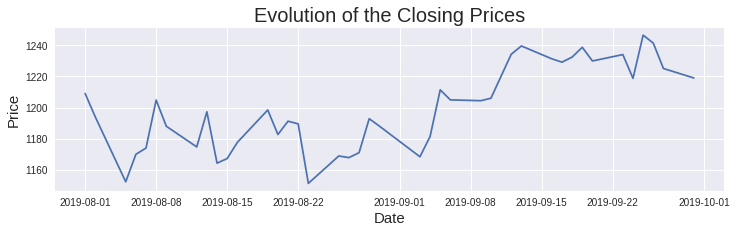

In [ ]:
plt.figure(figsize = (12, 3))
plt.plot(few_days['close'])

plt.title('Evolution of the Closing Prices', fontsize = 20)
plt.ylabel('Price', fontsize = 15)
plt.xlabel('Date', fontsize = 15)

plt.show()

Let's now find the confidence interval using the `statsmodels` function

In [ ]:
SL = 0.05

des = smw.DescrStatsW(few_days['close'])
lower, upper = des.tconfint_mean(SL)

print('The {:2.0%} CL of the Closing Prices is [{:4.2f}, {:4.2f}]'.format(1-SL, lower, upper))

The 95% CL of the Closing Prices is [1191.39, 1208.22]


---
## <font color="slateblue">The Titanic Dataset</font>
 
**Download the Titanic Dataset from [kaggle.com](https://www.kaggle.com/c/titanic/data). You need to download the _train.csv_ dataset, available under the tab Data. In the same page, you find a brief explanation of the variables. Download the dataset to your computer and import it into this notebook. You should have a dataset with 891 observations and 12 variables. You can consider this dataset a sample of a larger population. You can also assume that the conditions for inference are satisfied and that, therefore, the CLT holds. Use $\alpha=0.05$ throughout your analysis.**

**The _goal_ of the task is to learn which characteristics of a passenger had an effect on the chance of survival. In other words, we want to know which variables contribute to increase the probability of survival of a passenger.  To achieve this goal, please address the following questions:**

 * **Explore the dataset and visualize the distribution of some of the variables.**
 * **Find a 95% confidence interval for the expected proportion of survivors. This is the target value, i.e., without knowing anything about a passenger, each person has a a priori probability of survival equal to the values you found here.**
 * **Create a histogram to visualize the distribution of `Age` of all the passenger. We want to have an idea of what type of passengers were aboard the Titanic. Next, divide your dataset between those that `survived` and those that did not survive. Create a histogram which plots side-by-side the distribution of age of passengers who survived and passengers who did not survive. What do you observe? Finally, find two 95% confidence intervals, one for the average age of survivors and another for those who did not.**
 * **Let us have a look at the variable `Sex`. Separate the passenger according to `gender`, and compute, for each subgroup, a 95% CI for the percentage of survivors. Which group was more likely to survive?**
 * **Go on and take a look at the `Pclass` and `SibSp` variables repeat the previous steps and then with all the information try to put everything together. Can you identify a set of variables which seem to have had an impact on the sruvival rate? Explain.**



In [ ]:
titanic = pd.read_csv("/content/mydrive/My Drive/Statistics and Data Analysis - 2019/Data Sets/titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's make the barplot for the `survived` variable. Note that first we need to find the frequencies

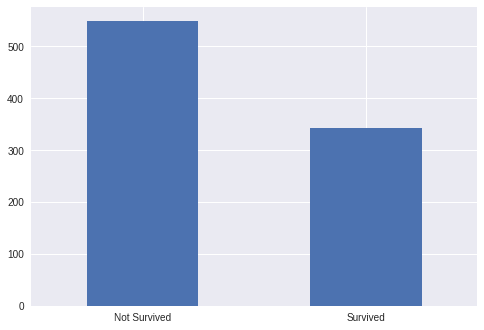

In [ ]:
table = titanic.groupby('Survived')['Survived'].count()

table.plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(["Not Survived", "Survived"], rotation='horizontal')
ax.set_xlabel('')

plt.show()

We can also find the frequencies of the `survived` variable grouped by the `Pclass`

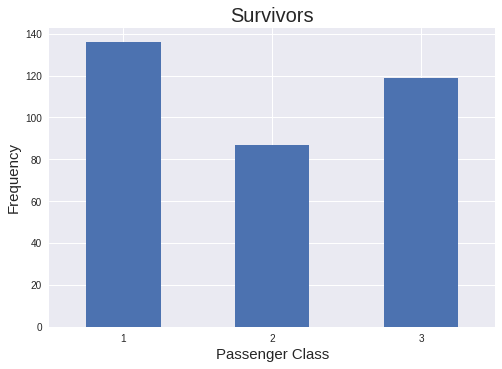

In [ ]:
table = titanic.groupby(['Pclass'])['Survived'].sum()

table.plot(kind = 'bar')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Passenger Class', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Survivors', fontsize = 20)

plt.show()

To find the confidence interval we have to find the frequencies again, as grouped by `survived` then we can use the `statsmodels` package to find the confidence interval. But, since this is a proportion, we need to check if the normal approximation can be used

In [ ]:
table = titanic.groupby('Survived')['Survived'].count()

In [ ]:
x = table[1]
n = sum(table)
p = x/n

NP = n*p
NQ = n*(1-p)

if NP >= 10:
  if NQ >= 10:
    print("We CAN use the Normal Approximation since np = {:<3.0f} and nq = {:<3.0f}".format(NP,NQ))
else:
  print("We CANNOT use the Normal Approximation since np = {:<3.0f} and nq = {:<3.2f}".format(NP,NQ))

We CAN use the Normal Approximation since np = 342 and nq = 549


Now the confidence interval is

In [ ]:
SL = 0.05
lower, upper = smp.proportion_confint(count=table[1], nobs=sum(table), alpha=0.05, method='normal')
print("The {:2.0%} CI for the proportion of survivors is: [{:4.3f}, {:4.3f}]".format(1-SL, lower, upper))

The 95% CI for the proportion of survivors is: [0.352, 0.416]


Let's now find the histogram of the `Age` variable

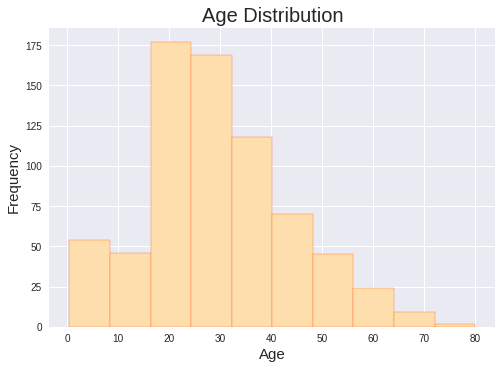

In [ ]:
titanic['Age'].hist(color = 'navajowhite', ec = 'orangered')
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Age Distribution', fontsize = 20)
plt.show()

Let's now split the dataset into survivors and not-survivors

In [ ]:
Survived = titanic[titanic['Survived']==1]
NotSurvived = titanic[titanic['Survived']==0]

Now we can make the histogram of the `Age` of both distributions

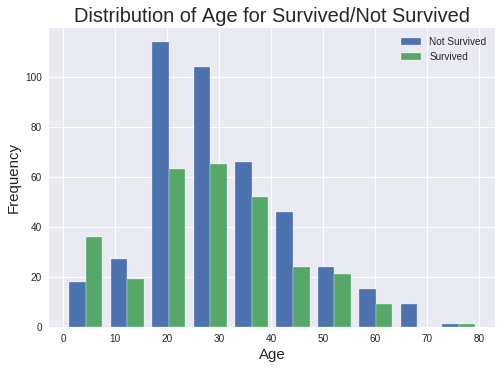

In [ ]:
plt.hist([NotSurvived['Age'], Survived['Age']],
         ec = 'white')
plt.legend(['Not Survived', 'Survived'])
plt.title("Distribution of Age for Survived/Not Survived", fontsize = 20)
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('Age', fontsize = 15)

plt.show()

Now, the confidence intervals can be found as follows

In [ ]:
SL = 0.05

res = smw.DescrStatsW(Survived['Age'].dropna())
lower, upper = res.tconfint_mean(SL)
print("{:2.0%} CI for Survived using is [{:3.3f}, {:3.3f}]".format(1-SL, lower, upper))

res = smw.DescrStatsW(NotSurvived['Age'].dropna())
lower, upper = res.tconfint_mean(SL)
print("{:2.0%} CI for Not Survived using t is [{:3.3f}, {:3.3f}]".format(1-SL, lower, upper))

95% CI for Survived using is [26.616, 30.072]
95% CI for Not Survived using t is [29.273, 31.979]


Let's now look at the `Sex` variable. In this case we will look for the proportions of survivors groups by gender, then

In [ ]:
sex = titanic.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

The check for the normal approximation can be dones as

In [ ]:
x_fem = sex[0]
n = sex.sum()
p = x_fem/n

NP = n*p
NQ = n*(1-p)

if NP >= 10:
  if NQ >= 10:
    print("We CAN use the Normal Approximation since np = {:<3.0f} and nq = {:<3.0f}".format(NP,NQ))
else:
  print("We CANNOT use the Normal Approximation since np = {:<3.0f} and nq = {:<3.2f}".format(NP,NQ))

We CAN use the Normal Approximation since np = 233 and nq = 109


then, the confidence intervals are

In [ ]:
SL = 0.05

females = titanic[titanic['Sex']=='female']
males = titanic[titanic['Sex']=='male']

lower, upper = smp.proportion_confint(count=sum(females['Survived']), nobs=females['Survived'].count(), alpha = SL, method='normal')
print("The {:2.0%} CI of the Survivor Females is [{:3.3f}, {:3.3f}]".format(1-SL, lower, upper))

lower, upper = smp.proportion_confint(count=sum(males['Survived']), nobs=males['Survived'].count(), alpha = SL, method='normal')
print("The {:2.0%} CI of the Survivor Males is [{:3.3f}, {:3.3f}]".format(1-SL, lower, upper))

The 95% CI of the Survivor Females is [0.694, 0.790]
The 95% CI of the Survivor Males is [0.157, 0.221]


---
# <font color = "Red"> Hypothesis Testing </font>

## <font color="slateblue">IQ Score of Gifted Children</font>

**Researchers investigating characteristics of gifted children collected data from schools in a large city on a random sample of thirty-six children who were identified as gifted children soon after they reached the age of four. The following histogram shows the distribution of the ages (in months) at which these children first counted to 10 successfully. Also provided are some sample statistics.**

  * **Import the dataset `gifted.csv` and store it into a pandas dataframe.**
  * **Build a histogram and compute sample statistics for the variable `count`, i.e., the age at which a baby first count to 10 successfully.**
  * **Are conditions for inference satisfied?**
  * **Suppose you read on a parenting website that children first count to 10 successfully when they are 32 months old, on average. Perform a hypothesis test to valuate if these data provide convincing evidence that the average age at which gifted children first count to 10 successfully is different than the general average of 32 months. Use a significance level of 0.10.**
  * **Interpret the p-value in context of the hypothesis test and the data.**
  * **Calculate a 90% confidence interval for the average age at which gifted children first count to 10 successfully.**
  * **Do your results from the hypothesis test and the confidence interval agree? Explain.**
  * **Carry out the hypothesis test and recompute the confidence interval using `statsmodels`. Compare the results with those obtained in the previous questions.**
  * **Carry out the hypothesis test and recompute the confidence interval using `scipy.stats`. Compare the results with those obtained in the previous questions.**

In [ ]:
gifted = pd.read_csv('/content/mydrive/My Drive/Statistics and Data Analysis - 2019/Data Sets/gifted.csv')
gifted.head()

,score,fatheriq,motheriq,speak,count,read,edutv,cartoons
0,159,115,117,18,26,1.9,3.00,2.00
1,164,117,113,20,37,2.5,1.75,3.25
2,154,115,118,20,32,2.2,2.75,2.50
3,157,113,131,12,24,1.7,2.75,2.25
4,156,110,109,17,34,2.2,2.25,2.50


To plot the histogram we are going to use the usual `hist` function, but remember that you can use it from the dataframe or from the `matplotlib` package. Since we have to find the sample statistics, let's find these before and then make the plot

In [ ]:
count_mean = gifted['count'].mean()
count_median = gifted['count'].median()
count_mode = gifted['count'].mode()
count_sd = gifted['count'].std()
count_iqr = ss.iqr(gifted['count'])
count_skew = gifted['count'].skew()
count_kurt = gifted['count'].kurt()

print('{:^26s}\n'.format('SUMMARY STATISTICS') + '-'*26 +
      '\n\nCENTRAL TENDENCY\n' + '-'*16 +
      '\n{:<20s} {:<4.2f}\n'.format('Mean:', count_mean) +
      '{:<20s} {:<4.2f}\n'.format('Median:', count_median) +
      '{:<20s}'.format('Mode:'), [count_mode[i] for i in range(len(count_mode))], '\n',
      '\nVARIABILITY\n' + '-'*16 +
      '\n{:<20s} {:<4.2f}\n'.format('Standard Deviation:', count_sd) +
      '{:<20s} {:<4.2f}\n'.format('IQR:', count_iqr) +
      '\nSHAPE\n' + '-'*16 +
      '\n{:<20s} {:<4.2f}\n'.format('Skewness:', count_skew) +
      '{:<20s} {:<4.2f}\n'.format('Kurtosis:', count_kurt))

    SUMMARY STATISTICS    
--------------------------

CENTRAL TENDENCY
----------------
Mean:                30.69
Median:              31.00
Mode:                [32] 
 
VARIABILITY
----------------
Standard Deviation:  4.31
IQR:                 6.25

SHAPE
----------------
Skewness:            -0.21
Kurtosis:            -0.57



Now we can plot the histogram with the overimposed normal distribution 

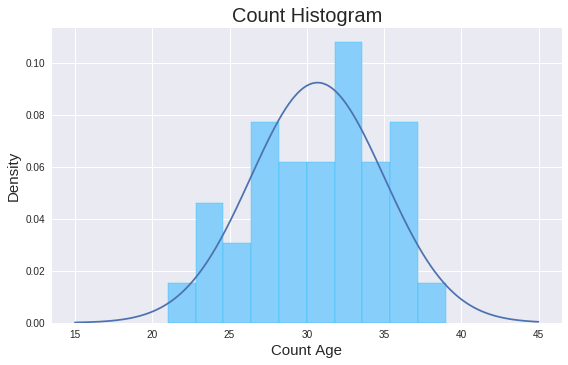

In [ ]:
x = np.arange(15, 45, 0.01)

gifted['count'].hist(color = "lightskyblue", ec = "deepskyblue", density = True)
plt.xlabel('Count Age', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.title('Count Histogram', fontsize = 20)

plt.plot(x, ss.norm.pdf(x, count_mean, count_sd))

plt.tight_layout(rect = (0,0,1,0.94))
plt.show()

The conditions for estimation are:

 * **Independency**: Since the data comes from a random sample and is less than the 10% of the population of gifted children, this assumption holds
 * **Normality**: The data is roughly symmetric (low skewness) and although the sample size is still a bit small, we may take the normal approximation. In any case, for this sample we can use the t-Student distribution

Given this, let's test for the value of 32 months. The decision scheme we take is

\begin{equation}
H_0:\{\mu=32\},\quad H_1:\{\mu\neq 32\}
\end{equation}

the idea is that we want to test if the value we have read about is true or false with our sample not if the average age is bigger or smaller. Then, using contrast statistics the condition to reject the null hypothesis is

\begin{equation}
\left|\frac{\bar x - \mu_0}{s_x/\sqrt{n}}\right|>t_{n-1,\alpha/2}
\end{equation}

let's find all these values

In [ ]:
SL = 0.10
mu0 = 32
n = len(gifted['count'])

stat = (count_mean - mu0)/(count_sd/np.sqrt(n))
t_value = ss.t.isf(SL/2, n - 1)

if np.abs(stat) > t_value:
  print('statistic: {:4.2f}\nt-value: {:4.2f}\n\nSince {:4.2f} > {:4.2f} REJECT the NULL hypothesis'.format(stat, t_value, np.abs(stat), t_value))
else:
  print('statistic: {:4.2f}\nt-value: {:4.2f}\n\nSince {:4.2f} < {:4.2f} we FAIL TO REJECT the NULL hypothesis'.format(stat, t_value, np.abs(stat), t_value))

statistic: -1.82
t-value: 1.69

Since 1.82 > 1.69 REJECT the NULL hypothesis


In this case we reject $H_0$, which means that there is evidence from our sample in favor of the alternative hypothesis. In our context this means that we can say for a 10% of significance level that the average age at which gifted children can count up to 10 is not 32 months.

This test could have been carried finding the **p-value**, using the contrast statistic and the significance level from the previous code cell we can easily do

In [ ]:
pval = 2*ss.t.cdf(stat, n-1)

if pval < SL:
  print('p-value: {:4.2f}\nSignificance Level: {:4.2f}\n\nSince {:4.2f} < {:4.2f} REJECT the NULL hypothesis'.format(pval, SL, pval, SL))
else:
  print('p-value: {:4.2f}\nSignificance Level: {:4.2f}\n\nSince {:4.2f} > {:4.2f} we FAIL TO REJECT the NULL hypothesis'.format(pval, SL, pval, SL))

p-value: 0.08
Significance Level: 0.10

Since 0.08 < 0.10 REJECT the NULL hypothesis


Which is in full agreement with our previous computation. However, this value let us see that if the significance level we had chosen were a 5% or a 1%, we would have failed to reject the hypothesis.

Let's now find the 90% **Confidence Interval**

In [ ]:
des = smw.DescrStatsW(gifted['count'])
lower, upper = des.tconfint_mean(SL)

print('The {:2.0%} CL of the Count Variable is [{:4.2f}, {:4.2f}]'.format(1-SL, lower, upper))

The 90% CL of the Count Variable is [29.48, 31.91]


As expected the value of 32 months read in the report and which has been tested above does not belong to the interval. This is in agreement with our rejection of this value from our sample.

Let's now find the p-value using both `statsmodels` and `scipy`.

  * In `statsmodels` we use the `DescrStatsW` function again. Since it has been called in the previous cell code, we do not call it again and simply use it

In [ ]:
stats, pval, DoF = des.ttest_mean(mu0)

if pval < SL:
  print('p-value: {:4.2f}\nSignificance Level: {:4.2f}\n\nSince {:4.2f} < {:4.2f} REJECT the NULL hypothesis'.format(pval, SL, pval, SL))
else:
  print('p-value: {:4.2f}\nSignificance Level: {:4.2f}\n\nSince {:4.2f} > {:4.2f} we FAIL TO REJECT the NULL hypothesis'.format(pval, SL, pval, SL))

p-value: 0.08
Significance Level: 0.10

Since 0.08 < 0.10 REJECT the NULL hypothesis


We obtain the same result as before. Now,

  * With `scipy.stats` we use the `ttest_1samp` function (note that it is a number '1' and not an 'l')


In [ ]:
stats, pval = ss.ttest_1samp(gifted['count'], mu0)

if pval < SL:
  print('p-value: {:4.2f}\nSignificance Level: {:4.2f}\n\nSince {:4.2f} < {:4.2f} REJECT the NULL hypothesis'.format(pval, SL, pval, SL))
else:
  print('p-value: {:4.2f}\nSignificance Level: {:4.2f}\n\nSince {:4.2f} > {:4.2f} we FAIL TO REJECT the NULL hypothesis'.format(pval, SL, pval, SL))

p-value: 0.08
Significance Level: 0.10

Since 0.08 < 0.10 REJECT the NULL hypothesis


Then again, the same result as before.

---
## <font color="slateblue">Testing for Fibromyalgia</font>

**A patient named Diana was diagnosed with Fibromyalgia, a long-term syndrome of body pain, and was prescribed anti-depressants. Being the skeptic that she is, Diana didn't initially believe that anti-depressants would help her symptoms. However after a couple months of being on the medication she decides that the anti-depressants are working, because she feels like her symptoms are in fact getting better.**

  * **Write the hypotheses in words for Diana's skeptical position when she started taking the anti-depressants.**
  * **What is a Type 1 error in this context?**
  * **What is a Type 2 error in this context?**
  * **How would these errors affect the patient?**


Let's say that we want to test if the anti-depressants are actually working. Since the content of the test must be in $H_1$, we can write our decision scheme as

\begin{equation}
H_0:\{\text{anti-depressants do not work}\},\quad H_1:\{\text{anti-depressants do work}\}
\end{equation}

In this scheme we can say that

 * A **Type I error**, i.e. wrongly rejecting the null hypothesis, means that Diana wrongly concludes that the anti-depressants do work while they don't
 * A **Type II error**, i.e. wrongly rejecting the alternative hypothesis, means that Diana would wrongly conclude that the anti-depressants do not work while they do

In the first case Diana would go on with a treatment that is not doing anything to treat fibromyalgia while in the second she might stop taking a medicine that is actually helping her.

---
## <font color="slateblue">Happy Hours</font>

**A restaurant owner is considering extending the happy hour at his restaurant since he would like to see if it increases revenue. If it does, he will permanently extend happy hour. He estimates that the current average revenue per customer is €18 during happy hour. He runs the extended happy hour for a week and finds an average revenue of €19.25 with a standard deviation €3.02 based on a simple random sample of 70 customers.**

  * **Are conditions for inference satisfied?**
  * **Perform a hypothesis test. Suppose the customers and their buying habits this week were no different than in any other week for this particular bar. (This may not always be a reasonable assumption.)**
  * **Calculate a 90% confidence interval for the average revenue per customer.**
  * **Do your results from the hypothesis test and the confidence interval agree? Explain.**
  * **If your hypothesis test and confidence interval suggest a significant increase in revenue per customer, why might you still not recommend that the restaurant owner extend the happy hour based on this criterion? What may be a better measure to consider?**


To answer the first question we only have two pieces of information:

 * The sample is random, however, we do not know if 70 customers is less than the 10% of the population size
 * We have a size of 70 which may allow us to invoke que central limit theorem but we do not know anything about skewness

we will assume that the conditions do actually hold and, since the owner wants to know if at happy hour the average revenue increases with an actual value of $18, we propose the following decision scheme

\begin{equation}
H_0:\{\mu = 18\},\quad H_1:\{\mu > 18\}
\end{equation}

since we do not have any raw data we need to use the formula directly, then

In [ ]:
mean = 19.25
std = 3.02
n = 70
mu0 = 18
CL = 0.90
SL = 1 - CL


with a right-tailed test the confidence interval extends from the critical value to $\infty$. Then a total area of 90% implies that we look for the 90% percentile of the t-Student distribution as the lower boundary. Note that `this confidence interval returns a lower boundary for the population mean, then

In [ ]:
t_val = ss.t.ppf(CL, n-1)

ME = t_val*std/np.sqrt(n)
lower = mean - ME

print('The {:2.0%} CL interval is [{:4.2f}, Inf)'.format(CL, lower))

The 90% CL interval is [18.78, Inf)


Let's test the hypothesis and then we will interpret both results together

In [ ]:
stat = (mean - mu0)/(std/np.sqrt(n))
pval = ss.t.sf(stat, n - 1)

if pval < SL:
  print('p-value: {:4.4f}\nSignificance Level: {:4.2f}\n\nSince {:4.4f} < {:4.2f} REJECT the NULL hypothesis'.format(pval, SL, pval, SL))
else:
  print('p-value: {:4.4f}\nSignificance Level: {:4.2f}\n\nSince {:4.4f} > {:4.2f} we FAIL TO REJECT the NULL hypothesis'.format(pval, SL, pval, SL))

p-value: 0.0005
Significance Level: 0.10

Since 0.0005 < 0.10 REJECT the NULL hypothesis


Rejecting the null means that we have found evidence against it, i.e. that the average revenue can be assumed to be significantly greater than $18 for a 10% of significance level. This is in agreement with the interval we have found before, since the population mean lies outside of it.

For the last question there are many other things we may still need to consider, for example total profits: with a longer happy hour, the revenue over the entire evening may actually drop since lower prices are offered for a longer time. Also, costs usually rise when prices are lowered. A better measure to consider may be an increase in total profits for the entire evening.

---
## <font color="slateblue">Browsing on the Mobile Device</font>  

**A 2012 survey of  2,254 American adults indicates that 17% of cell phone owners do their browsing on their phone rather than a computer or other device.**

  * **According to an online article, a report from a mobile research company indicates that 38 percent of Chinese mobile web users only access the internet through their cell phones. Conduct a hypothesis test to determine if these data provide strong evidence that the proportion of Americans who only use their cell phones to access the internet is different than the Chinese proportion of 38\%.**
  * **Interpret the p-value in this context**
  * **Calculate a 95% confidence interval for the proportion of Americans who access the internet on their cell phones, and interpret the interval in this context.**


In this case we are testing proportions, with the following data

In [ ]:
phat = 0.17
n = 2254
P0 = 0.38

then we can write the following decision scheme

\begin{equation}
H_0:\{P = 0.38\},\quad H_1:\{P\neq 0.38\}
\end{equation}

then, in absence of the raw data we will use the formula once we check normality

In [ ]:
NP = n*phat
NQ = n*(1-phat)

if NP >= 10:
  if NQ >= 10:
    print("We CAN use the Normal Approximation since np = {:<3.0f} and nq = {:<3.0f}".format(NP,NQ))
else:
  print("We CANNOT use the Normal Approximation since np = {:<3.0f} and nq = {:<3.2f}".format(NP,NQ))

We CAN use the Normal Approximation since np = 383 and nq = 1871


Since we approximate with a normal distribution we can do

In [ ]:
stat = (phat - P0)/(np.sqrt(phat*(1-phat)/n))
pval = 2*ss.norm.cdf(stat)
stat,pval

(-26.54194492757878, 3.1814497477450816e-155)

with a p-value as small as $3\cdot 10^{-155}$ any common significance level we may choose will always be bigger, then we find strong evidence in favor of the alternative hypothesis and conclude that proportion of Americans who access internet in their mobile phones is not the 38%.

Let's complete this analysis by finding the 95% confidence interval 

In [ ]:
CL = 0.95
SL = 1 - CL
SE = np.sqrt(phat*(1-phat)/n)
z_crit = ss.norm.sf(SL/2)

ME = z_crit*SE
lower = phat - ME
upper = phat + ME

print('The {:2.0%} CI for the proportion of Americans who access internet in their mobile phones is [{:4.3f}, {:4.3f}]'.format(CL, lower, upper))

The 95% CI for the proportion of Americans who access internet in their mobile phones is [0.166, 0.174]


very far from the 38% of Chinese who do it.

---
## <font color="slateblue">Waiting at the ER</font>

**ER wait times at a hospital were being analyzed. The previous year's average was 128 minutes. Suppose that this year's average wait time is 135 minutes. We would like to know whether this year average waiting time is just an "accident" and we  can still consider that the average wating time has not changed, or whether the average waiting time is now different from 128 minutes.**

  * **Provide the hypotheses for this situation in plain language**
  * **If we plan to collect a sample size of $n=64$, what values could $\bar{x}$ take so that we reject $H_0$? Suppose the sample standard deviation (39 minutes) is the population standard deviation. You may assume that the conditions for the nearly normal model for $\bar{x}$ are satisfied.**
  * **Calculate the probability of a Type 2 error.**


In this case we may want to propose two different schemes:

 * On one hand that the average is/is not 128 minutes, or
 *On the other hand, that the average is/is bigger than 128 minutes

we are going to choose the first case, then

\begin{equation}
H_0:\{\mu=128\},\quad H_1:\{\mu\neq 128\}
\end{equation}

now, the problem gives us the following data

In [ ]:
mean = 135
sigma = 39
n = 64
mu0 = 128

The values we look for are the boundaries of an interval around the population mean, then if we take a 95% of CL

In [ ]:
CL = 0.95
SL = 1 - CL
z_val = ss.norm.isf(SL/2)

lower = mean - z_val*sigma/np.sqrt(n)
upper = mean + z_val*sigma/np.sqrt(n)

print('The range of permited values for the sample mean are from {:4.2f} to {:4.2f} minutes'.format(lower, upper))

The range of permited values for the sample mean are from 125.45 to 144.55 minutes


This let us see that the sample value of the last year (128 minutes) is included in the range of the 95% permited values

Let's find the probability of a **Type II error**. Now we take 

\begin{equation}
H_0:\{\mu=128\},\quad H_1:\{\mu = 135\}
\end{equation}

and we assume that $\mu_1$ actually happens. Then

\begin{equation}
\begin{array}{rcl}
\beta & = & P\left( \bar X < \bar x_c|H_1\right)\\[2ex]
      & = & P\left( Z < \frac{\bar x_c - \mu_1}{\sigma/\sqrt{n}}\right)
\end{array}
\end{equation}

and the corresponding for the other side of the interval. These critical values were found in the previous part, then in order to keep the inner part of the interval we just do

In [ ]:
mu1 = 135

stat_b1 = (mu0 - mu1)/(sigma/np.sqrt(n)) + z_val
stat_b2 = (mu0 - mu1)/(sigma/np.sqrt(n)) - z_val

beta1 = ss.norm.cdf(stat_b1)
beta2 = ss.norm.cdf(stat_b2)

beta = beta1 - beta2
print('The Probability of a Type II error is the {:4.2%}'.format(beta) +
      '\nThe Power of the Test is the {:4.2%}'.format(1 - beta))

The Probability of a Type II error is the 69.95%
The Power of the Test is the 30.05%


In [ ]:
stat_b1, stat_b2

(0.5240665486426181, -3.39586142043749)

We can use the `statsmodels` package to find the power, however, remember that these functions use the t-distribution, then

In [ ]:
from statsmodels.stats.power import TTestPower
analysis = TTestPower()
powerTest = analysis.power(effect_size=(135-128)/39, nobs=64, alpha=0.05, alternative='two-sided')

print('The Probability of a Type II error is the {:4.2%}'.format(1 - powerTest) +
      '\nThe Power of the Test is the {:4.2%}'.format(powerTest))

The Probability of a Type II error is the 70.71%
The Power of the Test is the 29.29%
